In [2]:
import matplotlib
import pandas as pd
import numpy as np


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('gurgaon_properties_cleaned_v2.csv')

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,plot_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,experion windchants,sector 112,3.65,11428.0,3194.0,Built Up area: 2800 (260.13 sq.m.),3.0,5.0,2,3.0,South-West,Relatively New,NaN,2800.0,NaN,NaN,0,1,0,0,0,0,72
1,flat,vatika gurgaon,sector 83,1.25,7812.0,1600.0,Super Built up area 2390(222.04 sq.m.)Carpet a...,4.0,4.0,3,12.0,South-West,Moderately Old,2390.0,NaN,1600.0,NaN,0,1,0,0,0,0,103
2,flat,green court,sector 90,0.47,6811.0,690.0,Carpet area: 690 (64.1 sq.m.),2.0,2.0,1,0.0,East,New Property,NaN,NaN,690.0,NaN,0,0,0,0,0,0,49
3,flat,orchid petals,sector 49,1.90,10526.0,1805.0,Super Built up area 1805(167.69 sq.m.)Built Up...,3.0,3.0,3,2.0,South,Old Property,1805.0,1600.0,1400.0,NaN,0,0,0,0,1,2,49
4,flat,bestech altura,sector 79,2.69,12500.0,2152.0,Super Built up area 2150(199.74 sq.m.),3.0,4.0,3+,3.0,NaN,New Property,2150.0,NaN,NaN,NaN,0,1,0,0,0,0,49


In [8]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,plot_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
682,house,independent,sector 50,11.58,35741.0,3240.0,Plot area 360(301.01 sq.m.),5.0,5.0,3,2.0,NaN,Moderately Old,NaN,360.0,NaN,360.0,0,1,0,0,0,0,20
1373,flat,dlf the primus,sector 82a,1.80,13846.0,1300.0,Super Built up area 1818(168.9 sq.m.)Carpet ar...,3.0,3.0,3+,10.0,North-East,Relatively New,1818.0,NaN,1300.0,NaN,0,1,0,0,0,1,174
1597,house,international city by sobha phase 2,sector 109,6.44,26502.0,2430.0,Plot area 270(225.75 sq.m.),4.0,5.0,3+,3.0,North-East,New Property,NaN,270.0,NaN,270.0,1,1,1,1,0,0,138
3811,house,independent,sector 24,10.00,229885.0,435.0,Carpet area: 435 (40.41 sq.m.),8.0,10.0,3+,1.0,West,Undefined,NaN,NaN,435.0,NaN,0,0,0,0,0,0,0
3523,flat,emaar mgf emerald floors premier,sector 65,2.35,14242.0,1650.0,Built Up area: 1650 (153.29 sq.m.)Carpet area:...,3.0,3.0,3,2.0,South-West,Relatively New,NaN,1650.0,1200.0,NaN,1,1,0,0,0,0,158


In [9]:
df.shape

(3850, 24)

C:\Users\RAHUL\AppData\Local\Temp\ipykernel_18040\4207564571.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

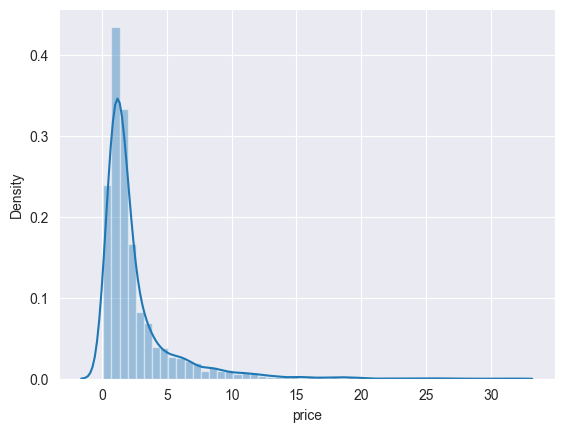

In [12]:
sns.distplot(df['price'])

<Axes: xlabel='price', ylabel='Count'>

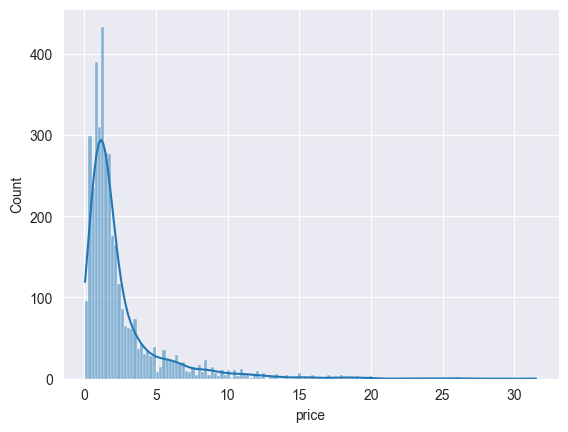

In [13]:
sns.histplot(df['price'], kde=True)


<Axes: xlabel='price'>

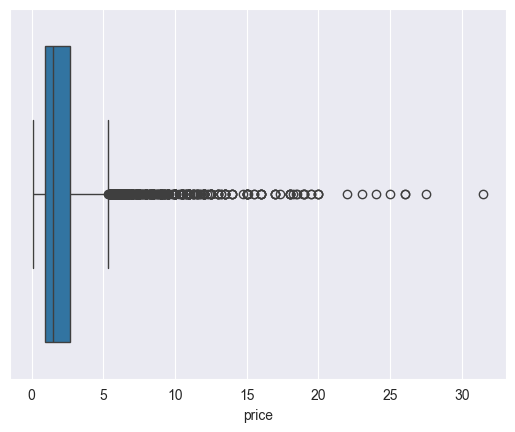

In [14]:
sns.boxplot(x=df['price'])

In [15]:
# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

In [16]:
outliers.shape

(432, 24)

In [18]:
outliers['price'].describe()

count    432.000000
mean       9.196157
std        4.061291
min        5.350000
25%        6.400000
50%        8.000000
75%       10.607500
max       31.500000
Name: price, dtype: float64

In [19]:
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats

(432,
 count    432.000000
 mean       9.196157
 std        4.061291
 min        5.350000
 25%        6.400000
 50%        8.000000
 75%       10.607500
 max       31.500000
 Name: price, dtype: float64)

In [20]:
outliers.sort_values('price',ascending=False).head(20)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,plot_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1783,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7.0,9.0,3+,3.0,North-East,Moderately Old,NaN,1000.0,NaN,1000.0,1,1,1,1,0,1,74
3071,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6.0,7.0,3+,3.0,North-East,Relatively New,NaN,1254.0,NaN,1254.0,1,1,0,1,1,2,42
2800,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6.0,7.0,3+,2.0,North-East,New Property,NaN,505.0,NaN,505.0,1,1,0,1,1,2,138
2753,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16.0,16.0,3+,4.0,North-West,New Property,NaN,400.0,350.0,402.0,1,1,1,1,0,2,72
576,house,suncity township,sector 54,25.00,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4.0,4.0,3+,2.0,North,Moderately Old,NaN,1000.0,NaN,1000.0,1,1,1,1,0,0,0
3194,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5.0,5.0,2,1.0,North-East,Old Property,NaN,400.0,NaN,400.0,1,1,0,1,0,2,122
1125,house,independent,sector 26,23.00,25556.0,9000.0,Plot area 1000(836.13 sq.m.),4.0,4.0,3+,2.0,South-West,Relatively New,NaN,1000.0,NaN,1000.0,1,1,1,1,0,2,145
613,house,vipul tatvam villa,sector 48,22.00,26667.0,8250.0,Plot area 1000(836.13 sq.m.),5.0,6.0,3,3.0,NaN,Moderately Old,NaN,1000.0,NaN,1000.0,0,1,0,0,0,0,54
1620,house,luxury dlf city floors,sector 26,20.00,48889.0,4091.0,Plot area 500(418.06 sq.m.),16.0,16.0,3+,4.0,NaN,New Property,NaN,500.0,NaN,500.0,0,1,0,0,0,2,31
317,house,independent,sector 26,20.00,44444.0,4500.0,Plot area 500(418.06 sq.m.),5.0,7.0,3+,3.0,West,Relatively New,NaN,500.0,NaN,500.0,0,1,0,1,0,1,97


on the basis of price we can say that there are some genuine outliers but there are some data error as well

C:\Users\RAHUL\AppData\Local\Temp\ipykernel_18040\2861189070.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

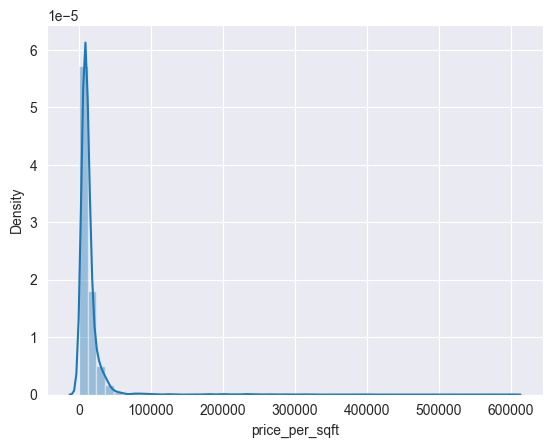

In [21]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft', ylabel='Count'>

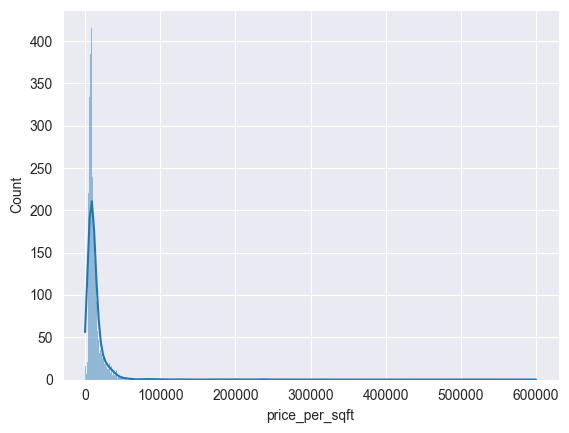

In [23]:
sns.histplot(df['price_per_sqft'],kde=True)

<Axes: xlabel='price_per_sqft'>

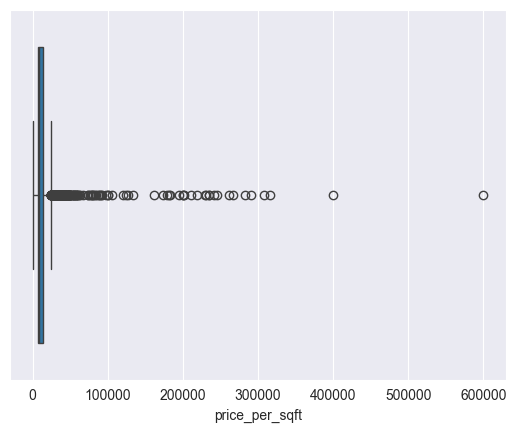

In [24]:
sns.boxplot(x=df['price_per_sqft'])

In [25]:
# Calculate the IQR for the 'price' column
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

In [26]:
outliers_sqft.shape

(360, 24)

In [29]:
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe()

count       360.000000
mean      52797.913889
std       61185.721124
min       24489.000000
25%       28175.250000
50%       33368.500000
75%       42037.500000
max      600000.000000
Name: price_per_sqft, dtype: float64

In [30]:
outliers_sqft


,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,plot_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
12,flat,dlf the grove,sector 43,6.00,25000.0,2400.0,Carpet area: 2400 (222.97 sq.m.),4.0,4.0,2,1.0,South-West,Under Construction,NaN,NaN,2400.0,NaN,0,1,0,0,0,2,49
34,house,sushant lok 1 builder floors,sector 43,1.65,30556.0,540.0,Plot area 60(50.17 sq.m.)Built Up area: 540 sq...,4.0,4.0,3+,4.0,West,Moderately Old,NaN,540.0,500.0,60.0,0,0,0,0,1,1,49
36,flat,vipul belmonte,sector 53,6.00,24489.0,2450.0,Super Built up area 2450(227.61 sq.m.),3.0,4.0,3+,6.0,North-West,Moderately Old,2450.0,NaN,NaN,NaN,0,1,0,0,1,2,26
51,house,not applicable,sector 4,0.80,54794.0,146.0,Plot area 146(13.56 sq.m.),5.0,4.0,3,3.0,NaN,Under Construction,NaN,146.0,NaN,146.0,0,0,0,0,0,0,0
52,house,independent,sector 46,6.50,27461.0,2367.0,Plot area 263(219.9 sq.m.),12.0,12.0,3+,4.0,North-West,Relatively New,NaN,263.0,NaN,263.0,1,0,0,1,0,2,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3811,house,independent,sector 24,10.00,229885.0,435.0,Carpet area: 435 (40.41 sq.m.),8.0,10.0,3+,1.0,West,Undefined,NaN,NaN,435.0,NaN,0,0,0,0,0,0,0
3815,house,dlf city plots phase 2,sector 25,4.25,31481.0,1350.0,Plot area 150(125.42 sq.m.),3.0,2.0,3,2.0,North,Old Property,NaN,150.0,NaN,150.0,1,0,0,0,0,0,35
3818,house,dlf city plots phase 2,sector 25,10.75,29861.0,3600.0,Plot area 400(334.45 sq.m.),9.0,9.0,3+,3.0,South-West,Old Property,NaN,400.0,NaN,400.0,0,1,1,1,0,0,73
3830,house,independent,sector 105,9.90,49500.0,2000.0,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2.0,2.0,2,3.0,North,Undefined,NaN,2000.0,1800.0,NaN,0,0,0,0,0,0,0


In [32]:
outliers_sqft = df[df['area'] < 1000].copy()
outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x: x * 9 if x < 1000 else x)
# Some property areas are mistakenly entered in square yards instead of square feet.
# 1 square yard = 9 square feet, so the code is converting those mistakenly small values.


In [33]:
outliers_sqft


,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,plot_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2,flat,green court,sector 90,0.47,6811.0,6210.0,Carpet area: 690 (64.1 sq.m.),2.0,2.0,1,0.0,East,New Property,NaN,NaN,690.000000,NaN,0,0,0,0,0,0,49
7,flat,godrej summit,sector 104,0.82,9854.0,7488.0,Carpet area: 77.31,2.0,2.0,3,12.0,NaN,Relatively New,NaN,NaN,77.310000,NaN,1,0,0,0,0,0,120
14,house,independent,sector 105,0.60,11102.0,4860.0,Plot area 60(50.17 sq.m.),8.0,4.0,3,3.0,West,New Property,NaN,60.0,NaN,60.0,0,0,0,0,0,0,17
18,flat,adani aangan arcade,sector 88a,0.45,7194.0,5634.0,Carpet area: 625.47 (58.11 sq.m.),2.0,2.0,1,8.0,NaN,New Property,NaN,NaN,625.490229,NaN,0,0,0,0,0,0,14
19,flat,kendriya vihar,sector 56,0.55,9016.0,5490.0,Carpet area: 610 (56.67 sq.m.),1.0,2.0,1,0.0,NaN,Old Property,NaN,NaN,610.000000,NaN,0,0,0,0,0,0,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,flat,signature global solera,sector 107,0.30,6134.0,4401.0,Super Built up area 602(55.93 sq.m.)Carpet are...,2.0,2.0,1,5.0,East,Relatively New,602.0,NaN,489.000000,NaN,0,0,0,0,0,0,57
3819,flat,signature the serenas,sohna road,0.42,7909.0,4779.0,Carpet area: 531 (49.33 sq.m.),2.0,2.0,1,12.0,NaN,New Property,NaN,NaN,531.000000,NaN,0,0,0,0,0,0,54
3821,flat,prime habitat,sector 99a,0.27,6049.0,4014.0,Carpet area: 448 (41.62 sq.m.),2.0,2.0,1,10.0,South,Relatively New,NaN,NaN,448.000000,NaN,0,0,0,0,0,0,67
3828,flat,godrej nature plus,sector 33,1.31,15982.0,7380.0,Carpet area: 76.44,2.0,2.0,2,4.0,NaN,Under Construction,NaN,NaN,76.440000,NaN,0,0,0,0,0,0,92


In [34]:
outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])
# price * 10000000: Converts the price from crores to actual rupees.

In [35]:
outliers_sqft['price_per_sqft'].describe()

count      694.000000
mean      2372.953890
std       5574.273207
min        228.000000
25%        694.750000
50%        907.000000
75%       1343.750000
max      66667.000000
Name: price_per_sqft, dtype: float64

In [36]:
df.update(outliers_sqft)

In [37]:
df.describe()


,price,price_per_sqft,area,bedRoom,bathroom,floorNum,super_built_up_area,built_up_area,carpet_area,plot_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
count,3785.000000,3823.000000,3785.000000,3803.000000,3803.000000,3784.000000,1915.000000,1733.000000,1944.000000,682.000000,3850.000000,3850.000000,3850.000000,3850.000000,3850.000000,3850.000000,3850.000000
mean,2.505804,10380.537013,3775.517041,3.338154,3.405469,6.810254,1921.658251,1835.927507,2483.466943,660.561642,0.187273,0.352468,0.089351,0.172208,0.109351,0.604675,70.536364
std,2.950121,8832.666368,22793.274055,1.876734,1.930456,6.027555,767.160169,17721.691076,22375.239293,1062.215261,0.390181,0.477801,0.285286,0.377610,0.312119,0.888177,52.712447
min,0.070000,4.000000,450.000000,1.000000,1.000000,0.000000,89.000000,2.000000,15.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.940000,5579.500000,1565.000000,2.000000,2.000000,2.000000,1457.000000,360.000000,824.000000,200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.000000
50%,1.500000,8424.000000,2048.000000,3.000000,3.000000,5.000000,1828.000000,1275.530000,1294.000000,316.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,58.000000
75%,2.700000,12819.000000,3240.000000,4.000000,4.000000,10.000000,2215.000000,1900.000000,1786.250000,527.750000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,108.000000
max,31.500000,82540.000000,875000.000000,21.000000,21.000000,51.000000,10000.000000,737147.000000,607936.000000,9000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,174.000000


C:\Users\RAHUL\AppData\Local\Temp\ipykernel_18040\2861189070.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

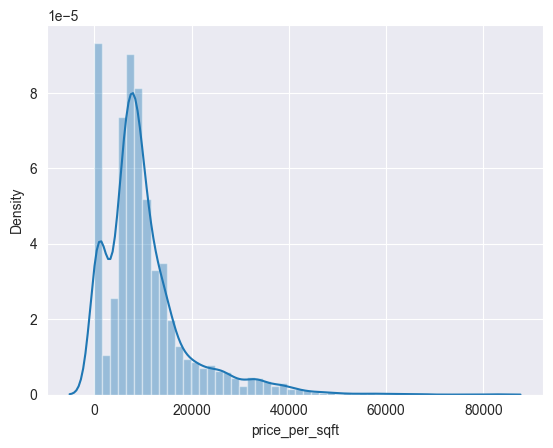

In [38]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

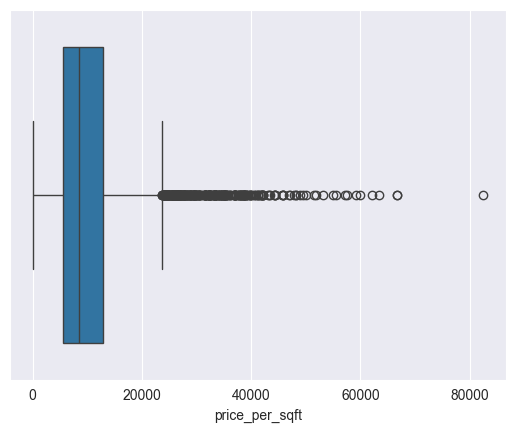

In [39]:
sns.boxplot(x=df['price_per_sqft'])

In [41]:
df[df['price_per_sqft']>50000].shape


(14, 24)

In [42]:
df = df[df['price_per_sqft'] <= 50000]

<Axes: xlabel='price_per_sqft'>

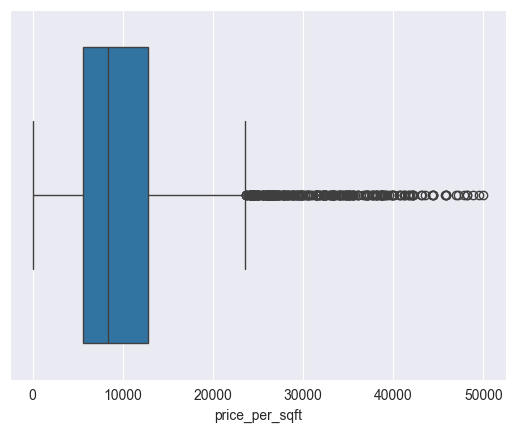

In [43]:
sns.boxplot(x=df['price_per_sqft'])

C:\Users\RAHUL\AppData\Local\Temp\ipykernel_18040\3155724510.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

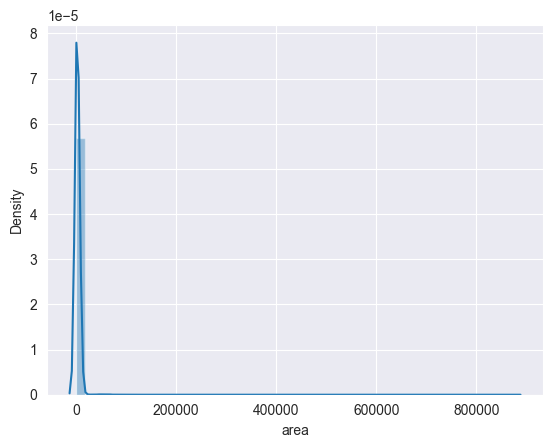

In [46]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

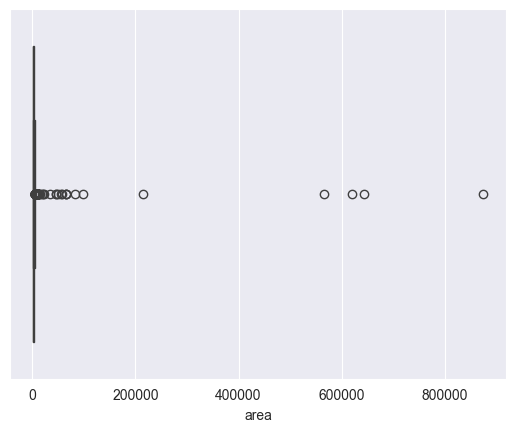

In [47]:
sns.boxplot(x=df['area'])

In [48]:
df['area'].describe()

count      3772.000000
mean       3780.049841
std       22832.324786
min         450.000000
25%        1565.000000
50%        2048.000000
75%        3240.000000
max      875000.000000
Name: area, dtype: float64

In [49]:
df[df['area'] > 100000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,plot_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
382,flat,signature global solera 2,sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2.0,2.0,1,3.0,North,New Property,NaN,NaN,514396.0,NaN,0,0,0,0,0,0,44
800,house,independent,sector 50,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6.0,5.0,3+,2.0,NaN,New Property,NaN,2.0,NaN,2.0,1,1,0,1,1,2,0
1297,flat,signature the roselia,sector 95,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2.0,2.0,2,2.0,South-West,New Property,NaN,NaN,569243.0,NaN,0,0,0,0,0,0,76
1799,flat,ramsons kshitij,sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2.0,2.0,1,1.0,North-East,Relatively New,NaN,NaN,607936.0,NaN,1,0,0,0,1,0,65
3718,flat,hcbs sports ville,sohna road,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2.0,2.0,2,8.0,NaN,Relatively New,NaN,737147.0,NaN,NaN,0,0,0,0,0,1,44


In [50]:
df = df[df['area'] < 100000]

C:\Users\RAHUL\AppData\Local\Temp\ipykernel_18040\3155724510.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

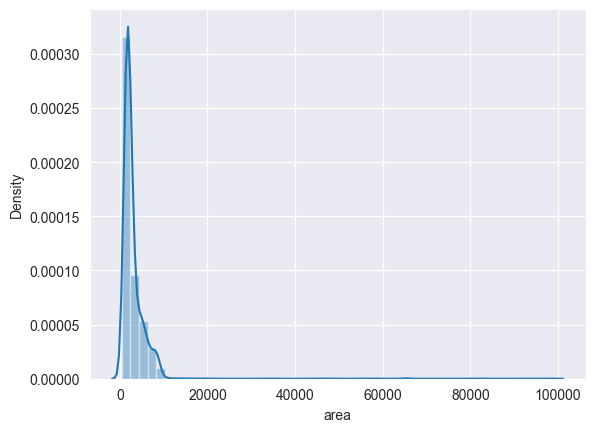

In [51]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

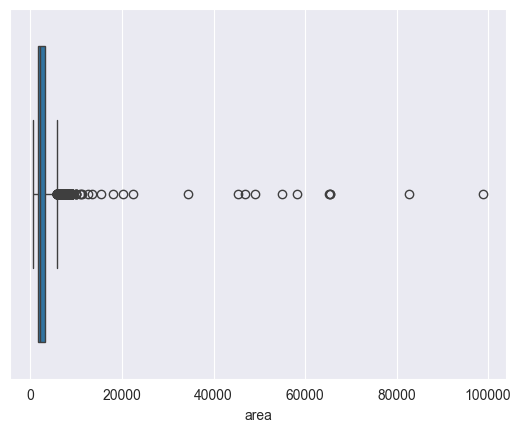

In [52]:
sns.boxplot(x=df['area'])

In [64]:
df[df['area'] > 10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,plot_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score


In [54]:
df.drop(index=[2550, 3522,468, 346, 928, 3602, 1763, 2654, 1714], inplace=True)


C:\Users\RAHUL\AppData\Local\Temp\ipykernel_18040\3856091052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(index=[2550, 3522,468, 346, 928, 3602, 1763, 2654, 1714], inplace=True)


In [61]:
df.drop(index=[3839,1183,2628,2402,2072,3170,1782,3071,1228,1502],inplace=True)

C:\Users\RAHUL\AppData\Local\Temp\ipykernel_18040\3652716953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(index=[3839,1183,2628,2402,2072,3170,1782,3071,1228,1502],inplace=True)


In [63]:
df.drop(index=[2403,    154],inplace=True)

In [65]:
df[df['area'] > 10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,plot_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score


C:\Users\RAHUL\AppData\Local\Temp\ipykernel_18040\3155724510.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

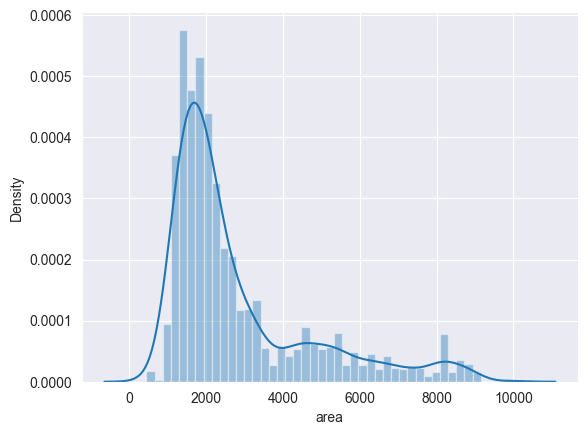

In [66]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

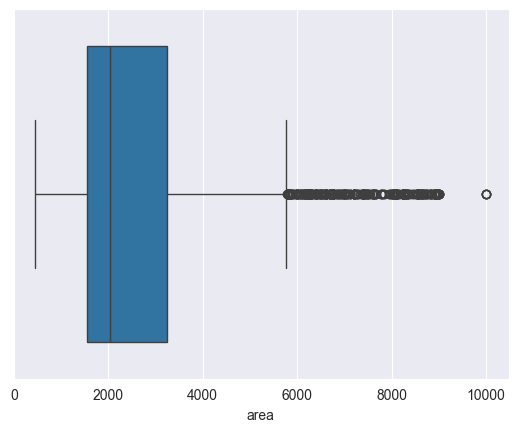

In [67]:
sns.boxplot(x=df['area'])

In [68]:
df['area'].describe()

count     3746.000000
mean      2812.070208
std       1888.957855
min        450.000000
25%       1557.000000
50%       2041.000000
75%       3240.000000
max      10000.000000
Name: area, dtype: float64

C:\Users\RAHUL\AppData\Local\Temp\ipykernel_18040\1737319938.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

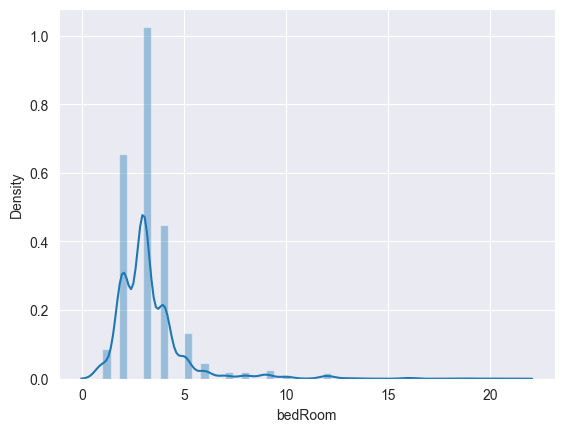

In [69]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

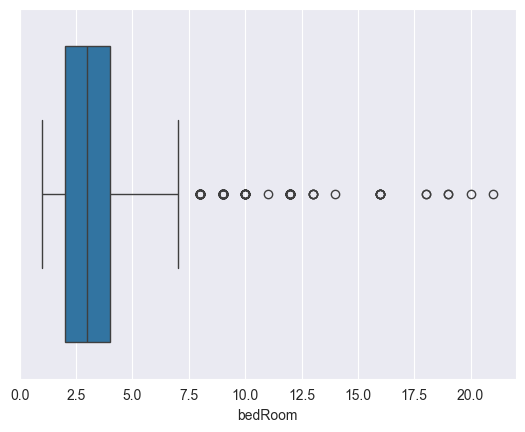

In [70]:
sns.boxplot(x=df['bedRoom'])

In [71]:
df['bedRoom'].describe()

count    3746.000000
mean        3.303257
std         1.799384
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [72]:
df[df['bedRoom'] > 10].sort_values('bedRoom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,plot_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1140,house,independent,sector 54,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21.0,21.0,3+,5.0,North,Relatively New,NaN,129.0,NaN,129.0,0,1,0,0,0,1,49
2490,house,independent,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),20.0,20.0,3+,4.0,East,Relatively New,NaN,128.0,NaN,128.0,0,1,0,0,0,1,22
359,house,independent,sector 17a,3.93,24214.0,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 162...,19.0,17.0,3,4.0,North-West,Relatively New,NaN,1622.0,NaN,1623.0,1,1,1,1,0,0,74
1865,house,independent,sector 17a,3.87,5160.0,7500.0,Plot area 1623(150.78 sq.m.)Built Up area: 750...,19.0,17.0,3+,5.0,North-West,Relatively New,NaN,7500.0,NaN,1623.0,1,0,1,0,0,0,68
216,house,independent,sector 54,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18.0,18.0,3+,4.0,South-West,Relatively New,NaN,160.0,NaN,160.0,0,1,0,0,0,1,70
304,house,private house,sector 55,7.05,46906.0,1503.0,Plot area 167(139.63 sq.m.),18.0,18.0,3+,4.0,North-East,Relatively New,NaN,167.0,NaN,167.0,0,0,0,0,1,1,57
1431,house,independent,sector 55,9.19,34037.0,2700.0,Plot area 300(250.84 sq.m.),16.0,18.0,2,4.0,West,New Property,NaN,300.0,NaN,300.0,0,1,0,1,0,2,49
3384,house,independent,sector 11,4.50,25000.0,1800.0,Plot area 200(167.23 sq.m.),16.0,16.0,3+,4.0,South,Relatively New,NaN,200.0,NaN,200.0,0,0,0,0,0,2,20
2412,house,dlf city plots,sector 26,20.00,44265.0,4518.0,Plot area 502(419.74 sq.m.),16.0,20.0,3+,4.0,North-East,New Property,NaN,502.0,NaN,502.0,1,1,1,1,0,2,153
2400,house,independent,sector 43,13.50,50000.0,2700.0,Plot area 300(250.84 sq.m.),16.0,16.0,3+,4.0,North-West,Relatively New,NaN,300.0,NaN,300.0,1,1,0,1,1,0,41


In [73]:
df = df[df['bedRoom'] <= 10]

In [74]:
df

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,plot_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,experion windchants,sector 112,3.65,11428.0,3194.0,Built Up area: 2800 (260.13 sq.m.),3.0,5.0,2,3.0,South-West,Relatively New,NaN,2800.0,NaN,NaN,0,1,0,0,0,0,72
1,flat,vatika gurgaon,sector 83,1.25,7812.0,1600.0,Super Built up area 2390(222.04 sq.m.)Carpet a...,4.0,4.0,3,12.0,South-West,Moderately Old,2390.0,NaN,1600.0,NaN,0,1,0,0,0,0,103
2,flat,green court,sector 90,0.47,757.0,6210.0,Carpet area: 690 (64.1 sq.m.),2.0,2.0,1,0.0,East,New Property,NaN,NaN,690.0,NaN,0,0,0,0,0,0,49
3,flat,orchid petals,sector 49,1.90,10526.0,1805.0,Super Built up area 1805(167.69 sq.m.)Built Up...,3.0,3.0,3,2.0,South,Old Property,1805.0,1600.0,1400.0,NaN,0,0,0,0,1,2,49
4,flat,bestech altura,sector 79,2.69,12500.0,2152.0,Super Built up area 2150(199.74 sq.m.),3.0,4.0,3+,3.0,NaN,New Property,2150.0,NaN,NaN,NaN,0,1,0,0,0,0,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3845,flat,corona optus,sector 37c,1.44,7250.0,1986.0,Carpet area: 1990 (184.88 sq.m.),3.0,3.0,3+,8.0,North-West,New Property,NaN,NaN,1990.0,NaN,0,1,0,0,0,0,37
3846,flat,signature global city,sector 37d,1.10,8800.0,1250.0,Carpet area: 1250 (116.13 sq.m.),3.0,3.0,3,1.0,NaN,Under Construction,NaN,NaN,1250.0,NaN,0,0,0,0,0,0,16
3847,flat,ss,sector 85,2.10,7467.0,2812.0,Super Built up area 2812(261.24 sq.m.)Built Up...,4.0,4.0,3,2.0,North-West,Relatively New,2812.0,2600.0,2400.0,NaN,0,0,0,0,0,0,49
3848,flat,la vida by tata housing,sector 113,3.35,12444.0,2692.0,Carpet area: 2692 (250.09 sq.m.),4.0,4.0,3+,11.0,North-East,Relatively New,NaN,NaN,2692.0,NaN,1,1,0,0,0,0,174


In [75]:
df.shape

(3701, 24)

<Axes: xlabel='bedRoom', ylabel='Count'>

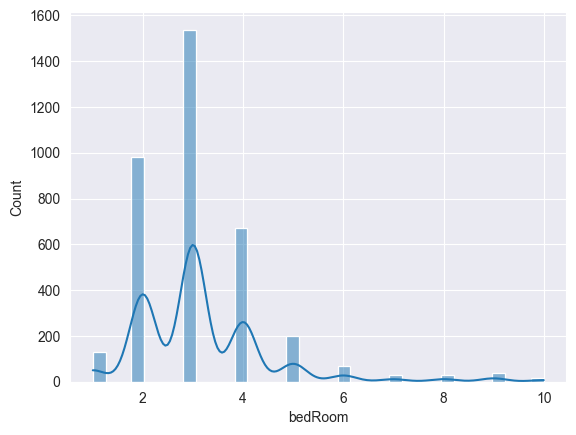

In [76]:
sns.histplot(df['bedRoom'],kde=True)

<Axes: xlabel='bedRoom'>

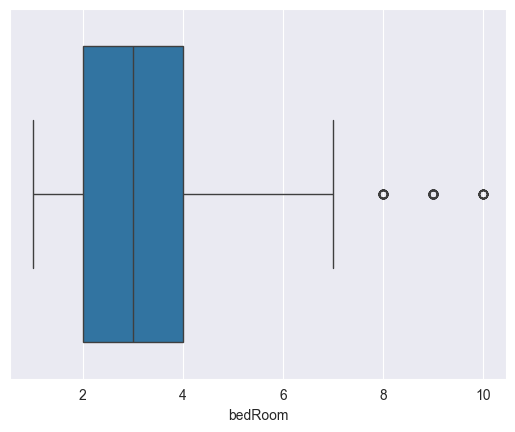

In [77]:
sns.boxplot(x=df['bedRoom'])

In [78]:

df['bedRoom'].describe()

count    3701.000000
mean        3.176979
std         1.366103
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bedRoom, dtype: float64

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,plot_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
898,house,adani brahma samsara,sector 60,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9.0,12.0,3+,3.0,North-East,Relatively New,NaN,6390.0,NaN,NaN,0,1,0,0,0,2,146
1485,house,independent,sector 24,11.00,28898.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8.0,11.0,3+,3.0,East,Old Property,NaN,5000.0,NaN,3806.45,1,1,0,1,1,2,39
1803,house,independent,sector 39,7.00,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10.0,11.0,3+,4.0,South-East,Relatively New,NaN,7000.0,NaN,350.00,0,0,0,1,0,2,38


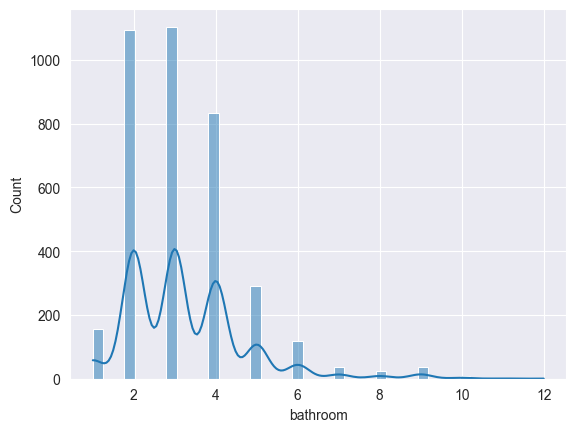

In [80]:
sns.histplot(df['bathroom'],kde=True)

df[df['bathroom'] > 10].sort_values('bathroom',ascending=False)


<Axes: xlabel='bathroom'>

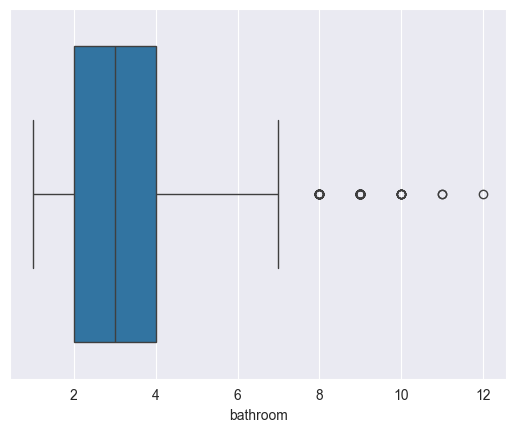

In [81]:
sns.boxplot(x=df['bathroom'])

In [82]:
df[df['bathroom'] > 10].sort_values('bathroom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,plot_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
898,house,adani brahma samsara,sector 60,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9.0,12.0,3+,3.0,North-East,Relatively New,NaN,6390.0,NaN,NaN,0,1,0,0,0,2,146
1485,house,independent,sector 24,11.00,28898.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8.0,11.0,3+,3.0,East,Old Property,NaN,5000.0,NaN,3806.45,1,1,0,1,1,2,39
1803,house,independent,sector 39,7.00,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10.0,11.0,3+,4.0,South-East,Relatively New,NaN,7000.0,NaN,350.00,0,0,0,1,0,2,38


In [83]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,plot_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,experion windchants,sector 112,3.65,11428.0,3194.0,Built Up area: 2800 (260.13 sq.m.),3.0,5.0,2,3.0,South-West,Relatively New,NaN,2800.0,NaN,NaN,0,1,0,0,0,0,72
1,flat,vatika gurgaon,sector 83,1.25,7812.0,1600.0,Super Built up area 2390(222.04 sq.m.)Carpet a...,4.0,4.0,3,12.0,South-West,Moderately Old,2390.0,NaN,1600.0,NaN,0,1,0,0,0,0,103
2,flat,green court,sector 90,0.47,757.0,6210.0,Carpet area: 690 (64.1 sq.m.),2.0,2.0,1,0.0,East,New Property,NaN,NaN,690.0,NaN,0,0,0,0,0,0,49
3,flat,orchid petals,sector 49,1.90,10526.0,1805.0,Super Built up area 1805(167.69 sq.m.)Built Up...,3.0,3.0,3,2.0,South,Old Property,1805.0,1600.0,1400.0,NaN,0,0,0,0,1,2,49
4,flat,bestech altura,sector 79,2.69,12500.0,2152.0,Super Built up area 2150(199.74 sq.m.),3.0,4.0,3+,3.0,NaN,New Property,2150.0,NaN,NaN,NaN,0,1,0,0,0,0,49


C:\Users\RAHUL\AppData\Local\Temp\ipykernel_18040\2747560385.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['super_built_up_area'])


<Axes: xlabel='super_built_up_area', ylabel='Density'>

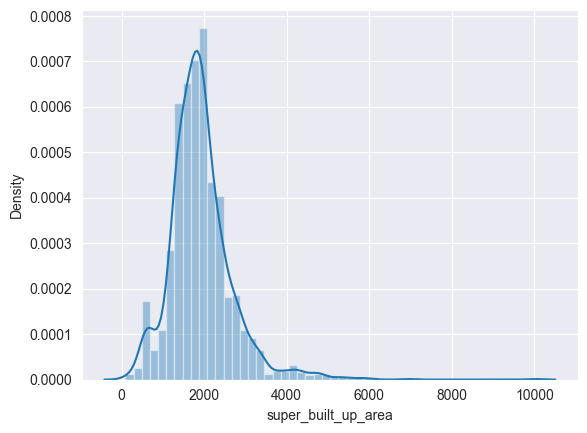

In [84]:
sns.distplot(df['super_built_up_area'])

<Axes: xlabel='super_built_up_area'>

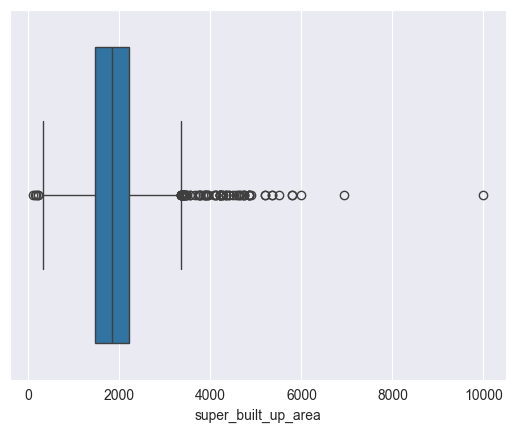

In [85]:
sns.boxplot(x=df['super_built_up_area'])

In [86]:
df['super_built_up_area'].describe()

count     1915.000000
mean      1921.658251
std        767.160169
min         89.000000
25%       1457.000000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [88]:
df[df['super_built_up_area'] > 6000].shape

(2, 24)

C:\Users\RAHUL\AppData\Local\Temp\ipykernel_18040\2846228355.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['built_up_area'])


<Axes: xlabel='built_up_area', ylabel='Density'>

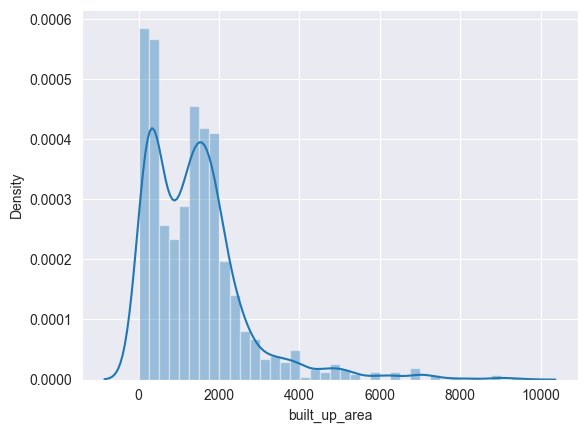

In [89]:
sns.distplot(df['built_up_area'])

<Axes: xlabel='built_up_area'>

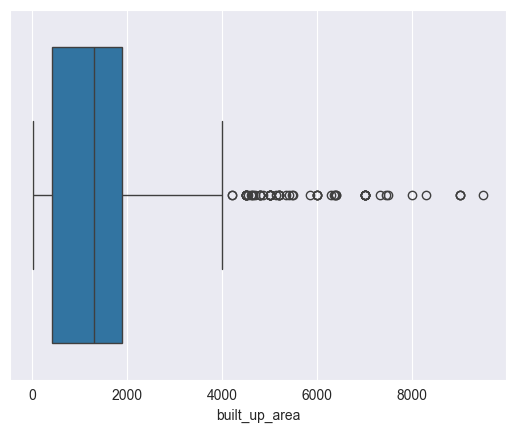

In [90]:

sns.boxplot(x=df['built_up_area'])

In [91]:

df[df['built_up_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,plot_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score


C:\Users\RAHUL\AppData\Local\Temp\ipykernel_18040\3069271804.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carpet_area'])


<Axes: xlabel='carpet_area', ylabel='Density'>

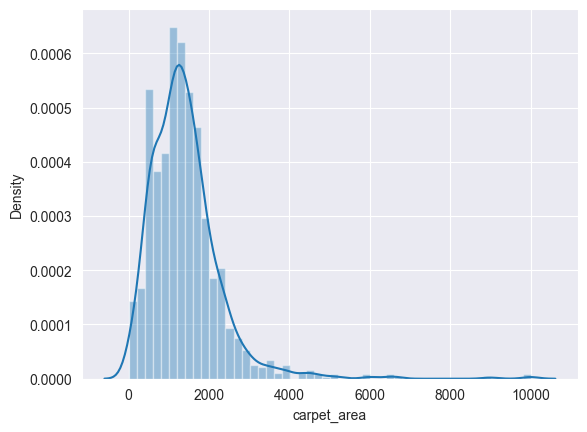

In [92]:
sns.distplot(df['carpet_area'])

<Axes: xlabel='carpet_area'>

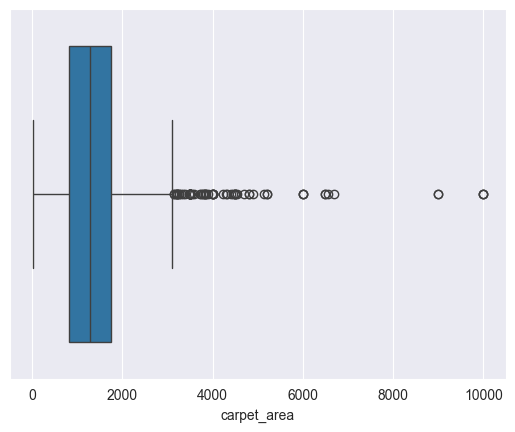

In [93]:
sns.boxplot(x=df['carpet_area'])

In [94]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,plot_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score


<Axes: xlabel='luxury_score', ylabel='Count'>

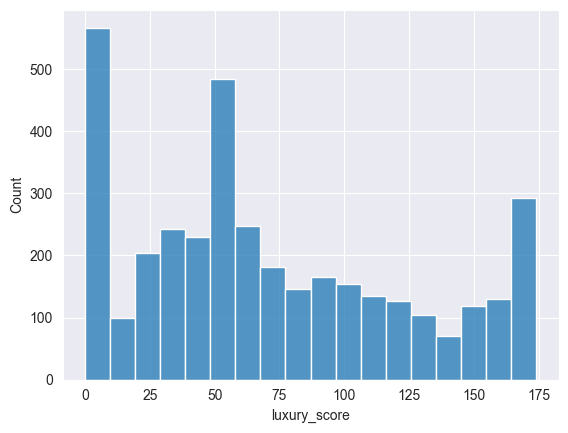

In [96]:
sns.histplot(df['luxury_score'],kde=True)

<Axes: ylabel='luxury_score'>

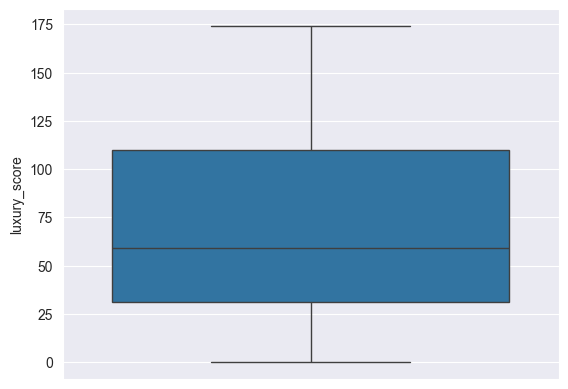

In [97]:

sns.boxplot(df['luxury_score'])

In [98]:
df.shape

(3701, 24)

In [99]:
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

C:\Users\RAHUL\AppData\Local\Temp\ipykernel_18040\2679828229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_per_sqft'] = round((df['price']*10000000)/df['area'])


In [100]:
df['price_per_sqft']

0       11428.0
1        7812.0
2         757.0
3       10526.0
4       12500.0
         ...   
3845     7251.0
3846     8800.0
3847     7468.0
3848    12444.0
3849     4080.0
Name: price_per_sqft, Length: 3701, dtype: float64

In [102]:
df.loc[:, 'price_per_sqft'] = round((df['price'] * 10000000) / df['area'])


C:\Users\RAHUL\AppData\Local\Temp\ipykernel_18040\2861189070.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

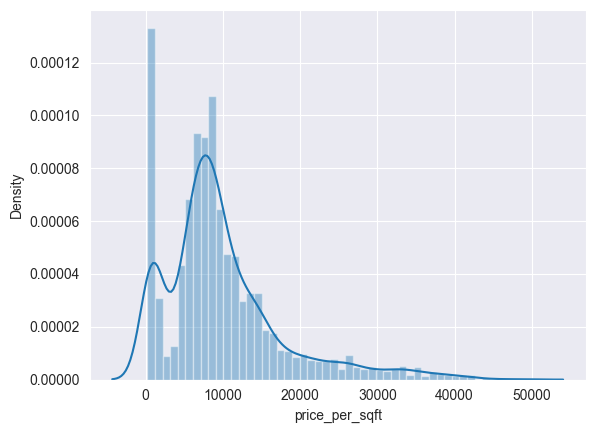

In [103]:
sns.distplot(df['price_per_sqft'])

In [104]:
df['price_per_sqft'].describe()

count     3701.000000
mean      9924.818157
std       7825.595946
min        228.000000
25%       5556.000000
50%       8333.000000
75%      12489.000000
max      49500.000000
Name: price_per_sqft, dtype: float64

In [106]:
df[df['price_per_sqft'] >49000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,plot_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3830,house,independent,sector 105,9.9,49500.0,2000.0,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2.0,2.0,2,3.0,North,Undefined,NaN,2000.0,1800.0,NaN,0,0,0,0,0,0,0


In [107]:
df.drop(index=[3830],inplace=True)

<Axes: xlabel='price_per_sqft', ylabel='Count'>

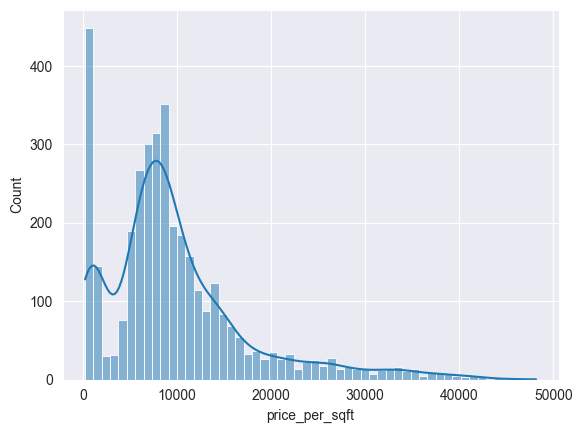

In [108]:
sns.histplot(df['price_per_sqft'],kde=True)

In [109]:
df['price_per_sqft'].describe()

count     3700.000000
mean      9914.122162
std       7799.550173
min        228.000000
25%       5556.000000
50%       8333.000000
75%      12485.250000
max      48148.000000
Name: price_per_sqft, dtype: float64

<Axes: ylabel='price_per_sqft'>

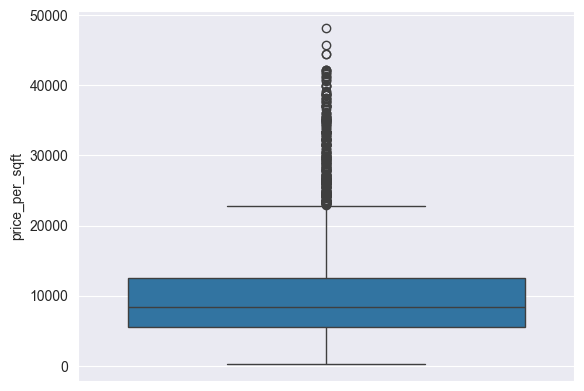

In [110]:
sns.boxplot(df['price_per_sqft'])

In [111]:
df[df['price_per_sqft'] > 42000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,plot_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
317,house,independent,sector 26,20.0,44444.0,4500.0,Plot area 500(418.06 sq.m.),5.0,7.0,3+,3.0,West,Relatively New,NaN,500.0,NaN,500.0,0,1,0,1,0,1,97
1345,house,independent,sector 28,12.0,42194.0,2844.0,Plot area 316(264.22 sq.m.),4.0,5.0,3+,4.0,East,Relatively New,NaN,316.0,NaN,316.0,0,1,1,1,0,2,60
1691,house,independent,sector 55,5.0,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9.0,9.0,3+,5.0,East,New Property,NaN,115.0,100.0,125.0,0,0,0,0,1,2,44
1961,house,dlf city plots,sector 26,19.0,42054.0,4518.0,Plot area 502(419.74 sq.m.),6.0,6.0,3,2.0,East,Relatively New,NaN,502.0,NaN,502.0,1,1,0,0,0,2,121
2151,house,sushant lok 1 builder floors,sector 43,13.0,48148.0,2700.0,Plot area 300(250.84 sq.m.),3.0,3.0,3+,4.0,North,New Property,NaN,300.0,NaN,300.0,0,0,0,1,0,2,7
2261,house,independent,sector 25,13.0,45710.0,2844.0,Plot area 316(264.22 sq.m.),6.0,8.0,3+,NaN,NaN,Relatively New,NaN,316.0,NaN,316.0,1,1,1,1,0,1,0
2965,house,independent,sector 26,19.0,42222.0,4500.0,Plot area 500(418.06 sq.m.),6.0,8.0,3+,3.0,East,Moderately Old,NaN,500.0,NaN,500.0,1,1,1,1,0,2,103
3560,house,independent,sector 43,9.5,42222.0,2250.0,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,5.0,5.0,3+,2.0,North-East,Relatively New,NaN,300.0,250.0,302.0,0,1,0,1,0,2,88


In [112]:
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.02)

337.81

In [114]:
df[(df['area']/df['bedRoom'])<337].shape


(134, 24)

In [115]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,plot_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,experion windchants,sector 112,3.65,11428.0,3194.0,Built Up area: 2800 (260.13 sq.m.),3.0,5.0,2,3.0,South-West,Relatively New,NaN,2800.0,NaN,NaN,0,1,0,0,0,0,72
1,flat,vatika gurgaon,sector 83,1.25,7812.0,1600.0,Super Built up area 2390(222.04 sq.m.)Carpet a...,4.0,4.0,3,12.0,South-West,Moderately Old,2390.0,NaN,1600.0,NaN,0,1,0,0,0,0,103
2,flat,green court,sector 90,0.47,757.0,6210.0,Carpet area: 690 (64.1 sq.m.),2.0,2.0,1,0.0,East,New Property,NaN,NaN,690.0,NaN,0,0,0,0,0,0,49
3,flat,orchid petals,sector 49,1.90,10526.0,1805.0,Super Built up area 1805(167.69 sq.m.)Built Up...,3.0,3.0,3,2.0,South,Old Property,1805.0,1600.0,1400.0,NaN,0,0,0,0,1,2,49
4,flat,bestech altura,sector 79,2.69,12500.0,2152.0,Super Built up area 2150(199.74 sq.m.),3.0,4.0,3+,3.0,NaN,New Property,2150.0,NaN,NaN,NaN,0,1,0,0,0,0,49


In [116]:
df.shape

(3700, 24)